# Classifier Trainer

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Set Dataset Paths

In [2]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Validate'

## Prepare Image for Training and Validation

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# useful for getting number of classes
folders = glob('Dataset/Train/*')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 191 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


## Create VGG16 Model

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

## Compile and Train the Model

In [6]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

C:\ProgramData\Anaconda3\envs\machineLearning\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
6/6 [==============================] - 72s 12s/step - loss: 0.9538 - accuracy: 0.6625 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - 66s 11s/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 63s 11s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 64s 11s/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 66s 11s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000


## Plot Training Result

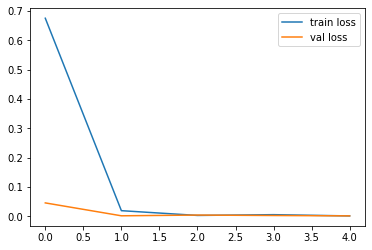

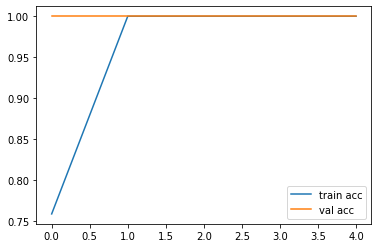

<Figure size 432x288 with 0 Axes>

In [7]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Save Trained Model

In [8]:
model.save('facefeatures_new_model.h5')